In [43]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('IRIS_clustering_data.csv')
x,y = data.drop(columns='species'), data['species']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
import warnings
warnings.filterwarnings('ignore')
cluster=[]
for i in range(1,16):
    model = KMeans(n_clusters=i)
    model.fit(x)
    inertia = model.inertia_
    cluster.append(inertia)

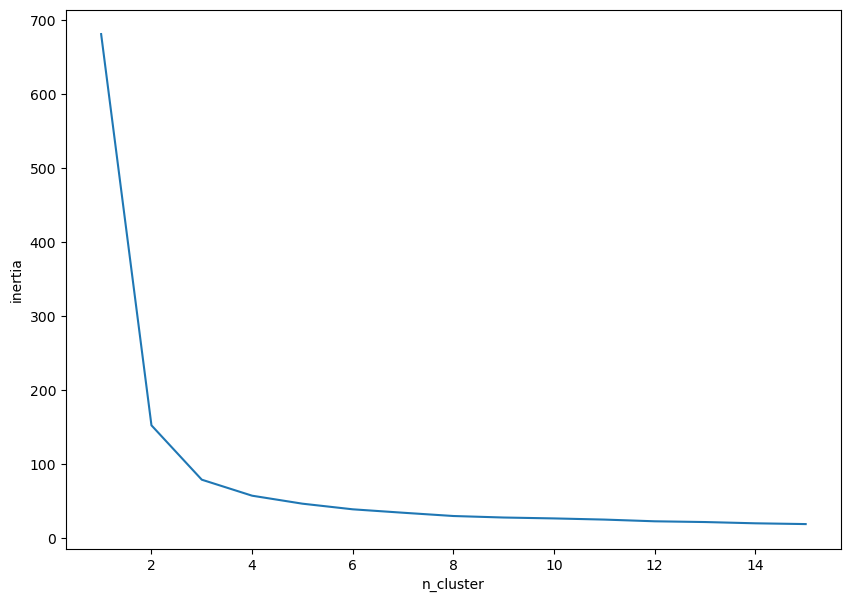

In [53]:
plt.figure(figsize=(10,7))
plt.plot(range(1,16),cluster)
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()

In [47]:
# silhouette_score_list=[]
# for k in range(2,16):
#     model=KMeans(n_clusters=k)
#     model.fit(x)
#     silhouette_score_list.append(silhouette_score(x,model.labels_))
# plt.figure(figsize=(10,7))
# plt.plot(range(2,16),silhouette_score_list)
# plt.xlabel('n_cluster')
# plt.ylabel('silhouette_score')
# plt.show()

In [48]:
# y1=pd.DataFrame(y)
# y1.value_counts()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)
final_model = KMeans(n_clusters = 3)
final_model.fit(x_train)

KMeans(n_clusters=3)

In [55]:
answer =final_model.predict(x_test)

In [83]:
label_category = {0:'Iris-virginica',1:'Iris-setosa' ,2:'Iris-versicolor' }
result=pd.DataFrame({'y_test':y_test,'prediction':answer})
result['prediction']=result['prediction'].map(label_category)
score1 = result['y_test'][result['y_test']==result['prediction']].count()
score = (len(result['y_test'])-score1)*100/100
score

4.0

In [72]:
# pd.DataFrame({'y_test':y_test[:11],'prediction':final_model.predict(x_test[:11])})
# # label_category = {0:'Iris-virginica',1:'Iris-setosa' ,2:'Iris-versicolor' }
y_test.shape

(30,)

In [51]:
y[100:150].value_counts()

Iris-virginica    50
Name: species, dtype: int64

In [52]:
y_test[:10].value_counts()

Iris-versicolor    4
Iris-virginica     3
Iris-setosa        3
Name: species, dtype: int64